<a href="https://colab.research.google.com/github/bartaLevente/udemy_tensorflow/blob/main/02_nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Binary classification

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

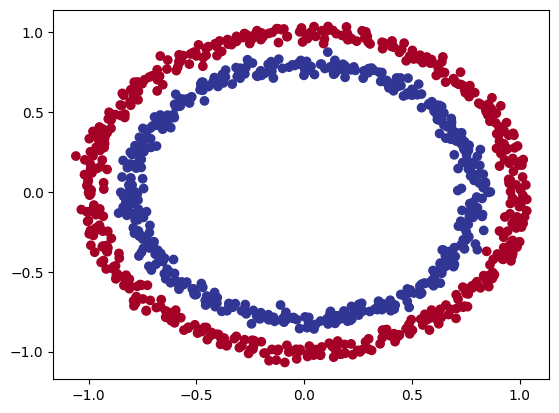

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})

plt.scatter(circles["X0"], circles["X1"], c=y, cmap=plt.cm.RdYlBu)

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
len(X), len(y)

(1000, 1000)

In [6]:
X[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

tf.random.set_seed(42)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4846 - loss: 0.6989
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4975 - loss: 0.6872
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5527 - loss: 0.6719
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5969 - loss: 0.6501
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6266 - loss: 0.6260
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7078 - loss: 0.5879
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8466 - loss: 0.5354
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9044 - loss: 0.4735
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9258 - loss: 0.4051
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9356 - loss: 0.3367
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9504 - loss: 0.2769
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9632 - lo

Text(0.5, 0, 'epochs')

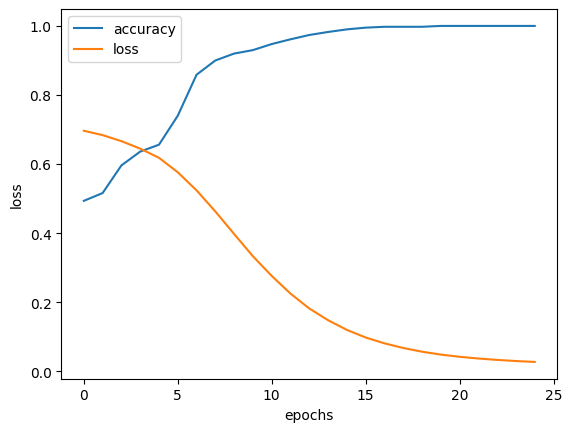

In [9]:
model = Sequential()
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer = Adam(),
              loss = BinaryCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train,y_train,epochs=25)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [10]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0273  


[0.028466498479247093, 1.0]

In [11]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, 100),
      np.linspace(y_min, y_max, 100),
  )

  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


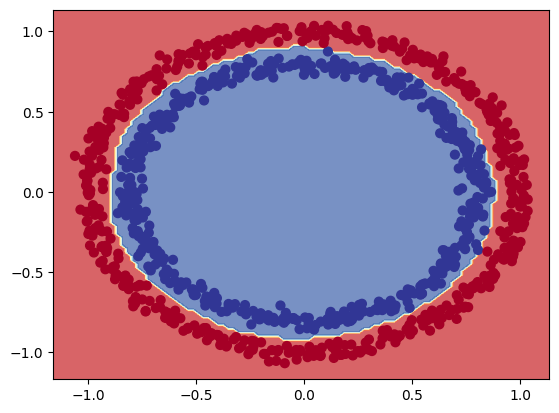

In [12]:
plot_decision_boundary(model, X, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


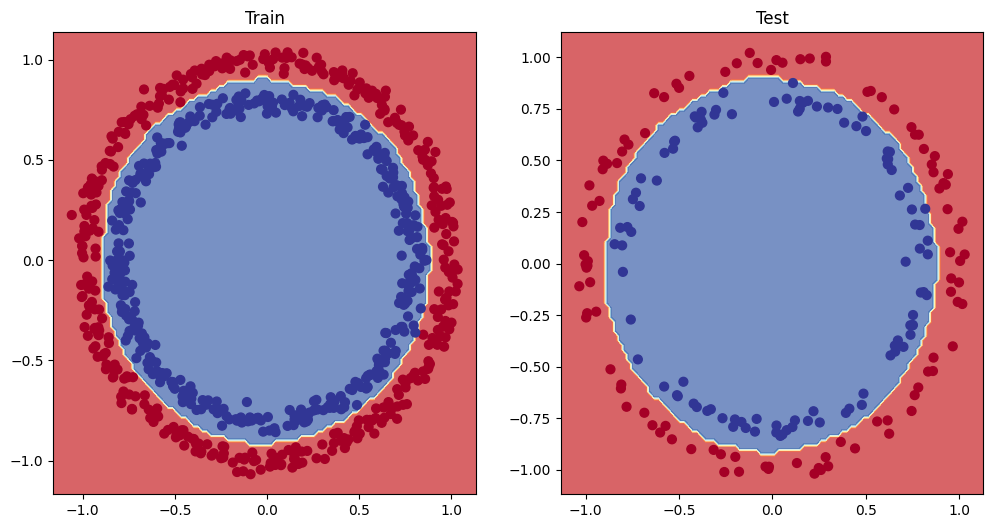

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

#Finding the best learning rate

In [14]:
from tensorflow.keras.callbacks import LearningRateScheduler

model_2 = Sequential()
model_2.add(Dense(8, activation="relu"))
model_2.add(Dense(4, activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

lrscreduler = LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))

model_2.compile(optimizer = Adam(),
              loss = BinaryCrossentropy(),
              metrics=["accuracy"])

history_2 = model_2.fit(X_train,y_train,epochs=100, callbacks=[lrscreduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4943 - loss: 0.7344 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4941 - loss: 0.7331 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4938 - loss: 0.7318 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4929 - loss: 0.7304 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4946 - loss: 0.7290 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4984 - loss: 0.7275 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4974 - loss: 0.7258 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4969 - loss: 0.7242 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4945 - loss: 0.7224 - learning_

<Axes: >

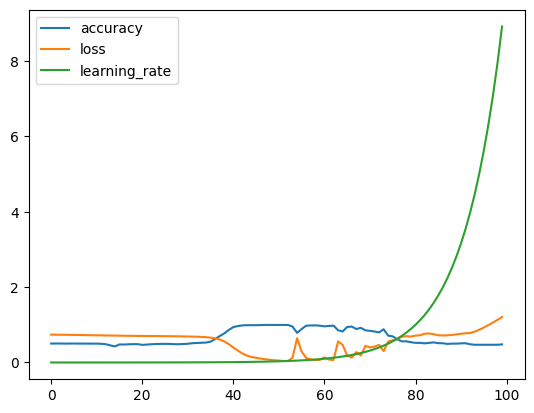

In [15]:
pd.DataFrame(history_2.history).plot()

Text(0, 0.5, 'Loss')

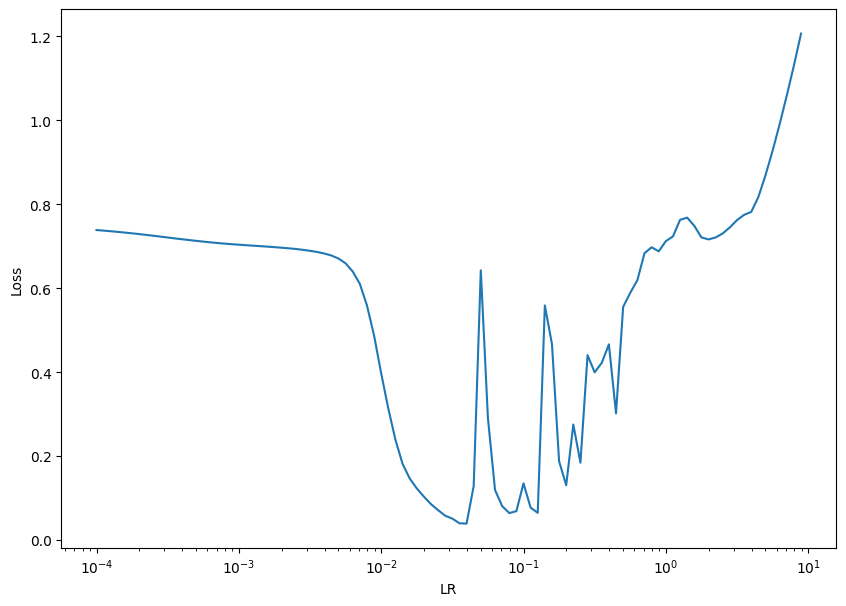

In [16]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_2.history["loss"])
plt.xlabel("LR")
plt.ylabel("Loss")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5038 - loss: 0.6944
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5216 - loss: 0.6886 
Epoch 3/100


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5417 - loss: 0.6831 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 0.6773 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5888 - loss: 0.6654 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 0.6489 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - loss: 0.6248 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.5906 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7625 - loss: 0.5469 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8299 - loss: 0.5003
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8675 - loss: 0.4521
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8883 - loss: 0.4020
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9478 - loss: 0.3433
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

<Axes: >

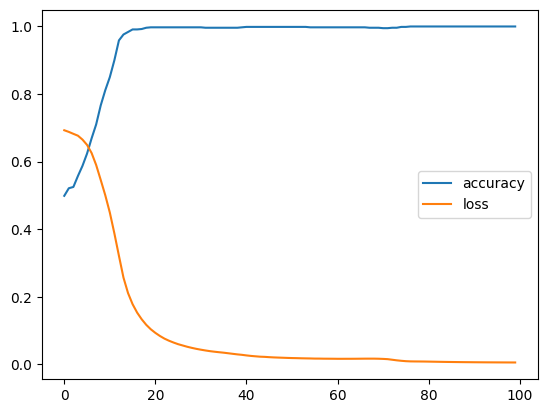

In [17]:
from tensorflow.keras.callbacks import EarlyStopping


model_3 = Sequential()
model_3.add(Dense(8, activation="relu"))
model_3.add(Dense(4, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

model_3.compile(optimizer = Adam(0.01),
              loss = BinaryCrossentropy(),
              metrics=["accuracy"])

early_stopping = EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True,
)

history_3 = model_3.fit(X_train,y_train,epochs=100, callbacks=[early_stopping])

pd.DataFrame(history_3.history).plot()

In [18]:
model_3.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9950 - loss: 0.0073 


[0.007278220262378454, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
binary classification


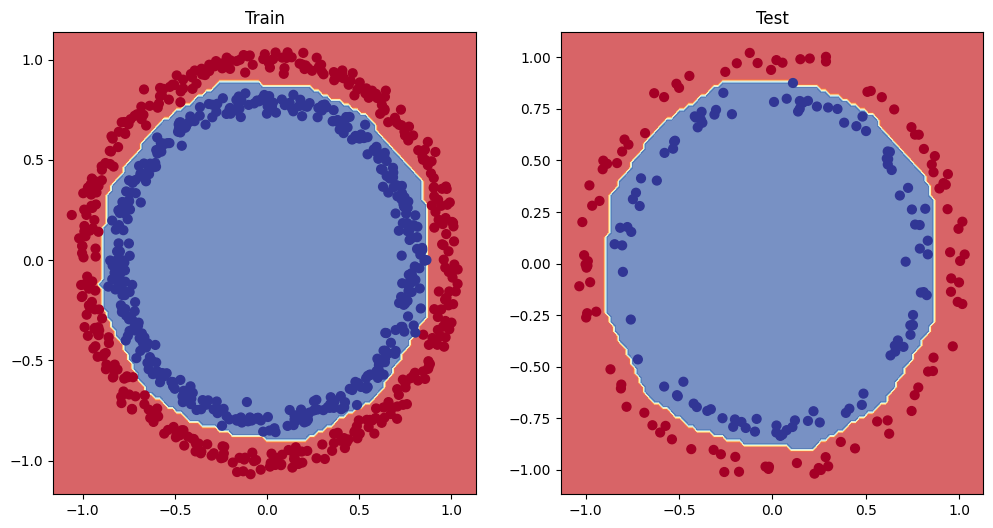

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

#Evaluation

In [20]:
loss, acc = model_3.evaluate(X_test,y_test)
print(f"Accuracy: {(acc * 100) : .2f}%")
print(f"Loss: {loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9950 - loss: 0.0073 
Accuracy:  99.50%
Loss: 0.007278220262378454


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


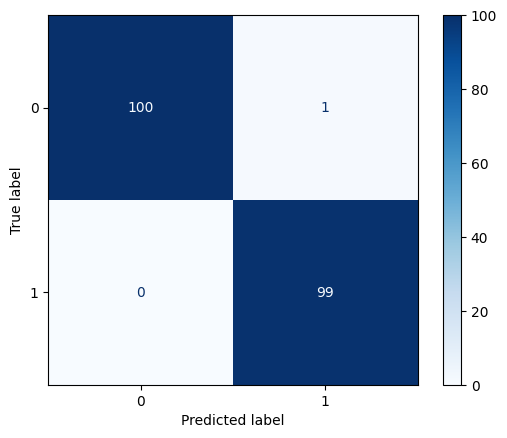

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model_3.predict(X_test)

cm = confusion_matrix(tf.round(y_pred), y_test)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot(cmap=plt.cm.Blues)

#Multiclass

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels) , (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [24]:
train_labels[0]

np.uint8(9)

In [25]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(len(class_names))

10


Ankle boot


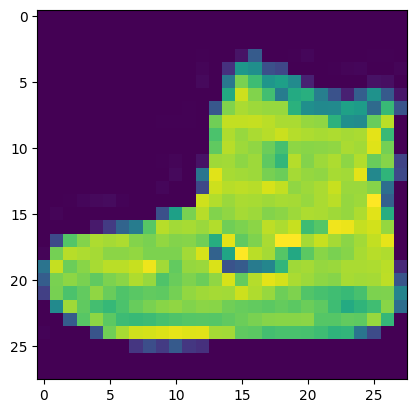

In [26]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])
print(class_names[train_labels[0]])

In [27]:
from sklearn.preprocessing import MinMaxScaler

train_data_reshaped = train_data.reshape(train_data.shape[0], -1)
test_data_reshaped = test_data.reshape(test_data.shape[0], -1)

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data_reshaped)
test_data = scaler.fit_transform(test_data_reshaped)

### LR


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5745 - loss: 1.3408 - val_accuracy: 0.7983 - val_loss: 0.6723 - learning_rate: 1.0000e-04
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8014 - loss: 0.6504 - val_accuracy: 0.8276 - val_loss: 0.5341 - learning_rate: 1.1220e-04
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8296 - loss: 0.5191 - val_accuracy: 0.8316 - val_loss: 0.4902 - learning_rate: 1.2589e-04
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8414 - loss: 0.4635 - val_accuracy: 0.8409 - val_loss: 0.4562 - learning_rate: 1.4125e-04
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8505 - loss: 0.4310 - val_accuracy: 0.8476 - val_loss: 0.4364 - learning_rate: 1.5849e-04
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8571 - loss: 0.4085 - val_accuracy: 0.8468 - val_loss: 0.4275 - learning_rate: 1.7783e-04
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1

<Axes: >

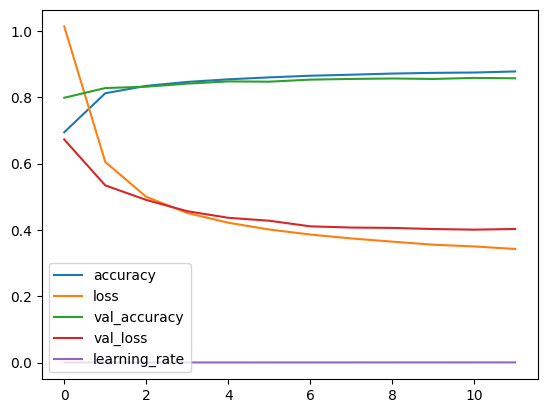

In [29]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Flatten, BatchNormalization
lrscreduler = LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))


model_5 = Sequential(
  [
    Dense(32, activation="relu"),
    BatchNormalization(),
    Dense(16, activation="relu"),
    BatchNormalization(),
    Dense(10, activation="softmax"),
  ]
)

model_5.compile(optimizer = "adam",
              loss = SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

early_stopping = EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True,
)

history_5 = model_5.fit(train_data,
                        train_labels,
                        validation_data=(test_data,test_labels),
                        epochs=100,
                        callbacks=[early_stopping, lrscreduler])

pd.DataFrame(history_5.history).plot()

Text(0, 0.5, 'Loss')

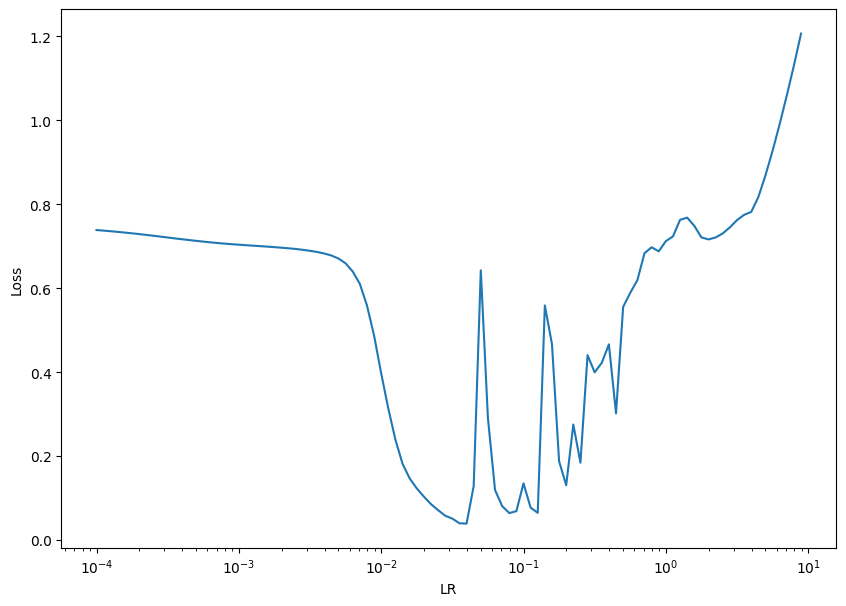

In [30]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_2.history["loss"])
plt.xlabel("LR")
plt.ylabel("Loss")

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7724 - loss: 0.6456 - val_accuracy: 0.8377 - val_loss: 0.4536
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8378 - loss: 0.4501 - val_accuracy: 0.8343 - val_loss: 0.4476
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8509 - loss: 0.4145 - val_accuracy: 0.8415 - val_loss: 0.4546


<Axes: >

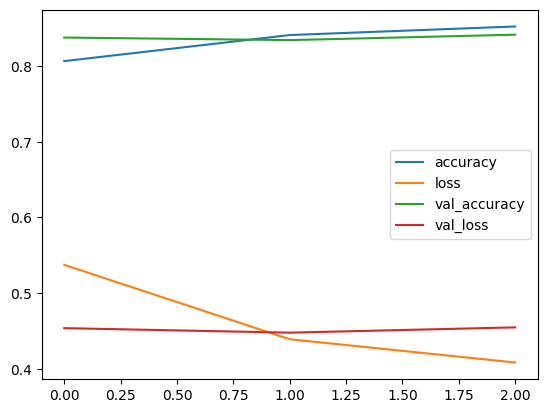

In [31]:
tf.random.set_seed(42)

model_4 = Sequential(
  [
    Dense(32, activation="relu"),
    BatchNormalization(),
    Dense(16, activation="relu"),
    BatchNormalization(),
    Dense(10, activation="softmax"),
  ]
)

model_4.compile(optimizer = Adam(0.01),
              loss = SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

early_stopping = EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True,
)

history_4 = model_4.fit(train_data,
                        train_labels,
                        validation_data=(test_data,test_labels),
                        epochs=100,
                        callbacks=[early_stopping])

pd.DataFrame(history_4.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


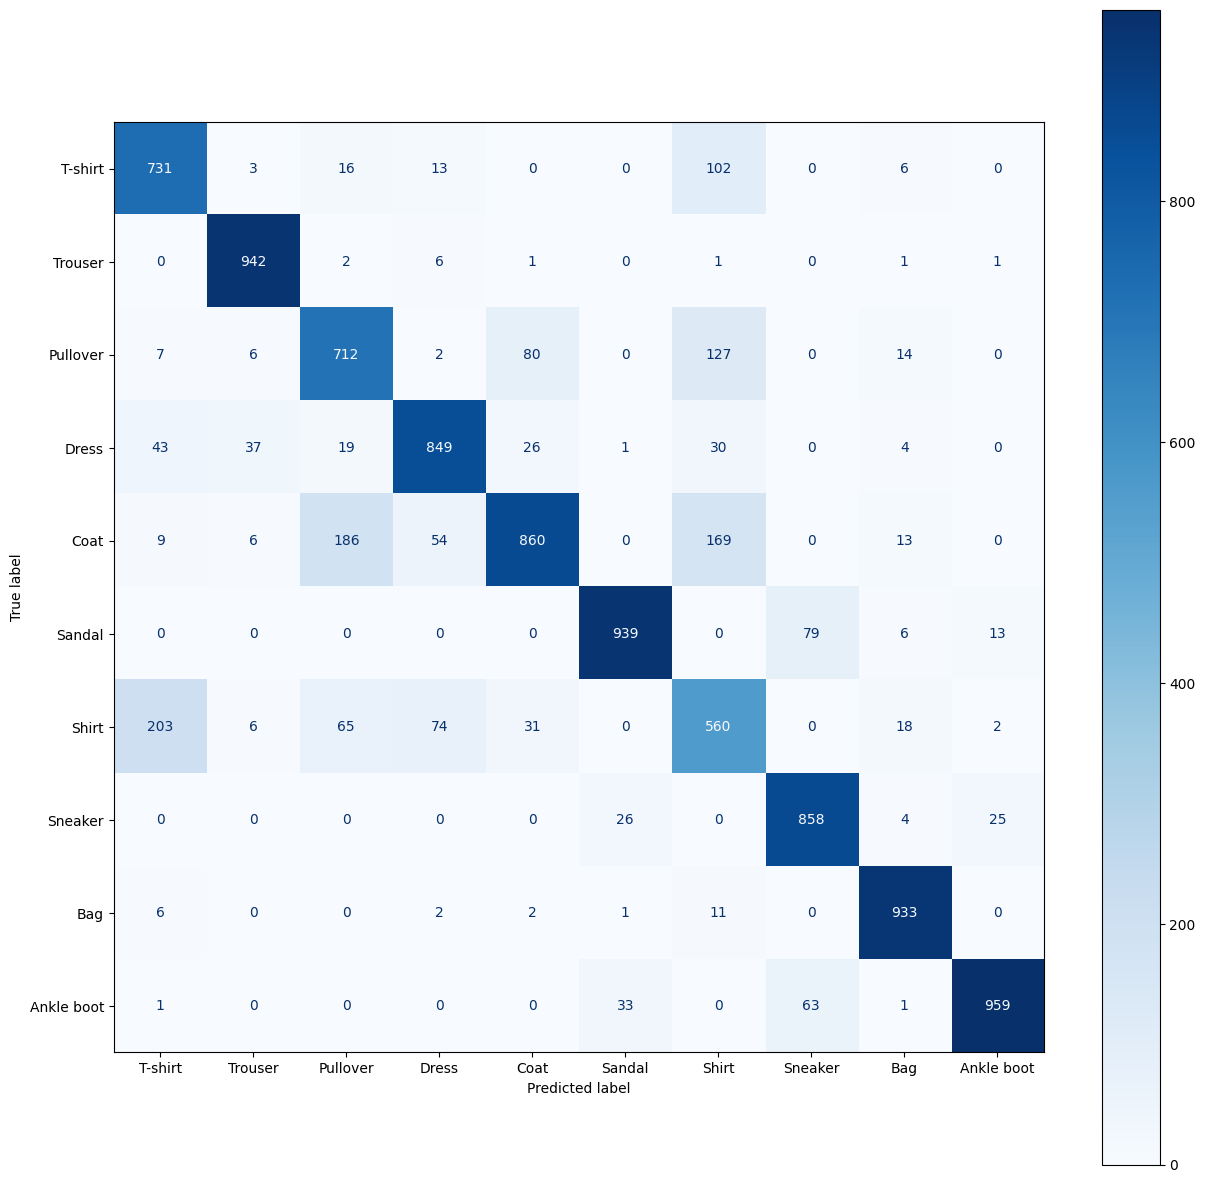

In [44]:
y_preds = model_4.predict(test_data)

y_pred_labels = tf.argmax(y_preds, axis=1)
fig, ax = plt.subplots(figsize=(15, 15))

cm_multi = confusion_matrix(y_pred_labels, test_labels)
cmd_multi = ConfusionMatrixDisplay(cm_multi, display_labels=class_names)
cmd_multi.plot(cmap=plt.cm.Blues, ax=ax)